In [1]:
import pandas as pd

df=pd.read_csv('rawdatame.csv')

In [2]:
df

,Incremental_ID,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1,E0,13-08-2005,NaN,Aston Villa,Bolton,2,2,D,2,...,2,6,14,16,7,8,0,2,0,0
1,2,E0,13-08-2005,NaN,Everton,Man United,0,2,A,0,...,5,5,15,14,8,6,3,1,0,0
2,3,E0,13-08-2005,NaN,Fulham,Birmingham,0,0,D,0,...,7,4,12,13,6,6,1,2,0,0
3,4,E0,13-08-2005,NaN,Man City,West Brom,0,0,D,0,...,8,3,13,11,3,6,2,3,0,0
4,5,E0,13-08-2005,NaN,Middlesbrough,Liverpool,0,0,D,0,...,2,7,17,11,5,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,26,NaN,31-08-2024,15:00,Nott'm Forest,Wolves,1,1,D,1,...,5,3,15,18,7,3,3,4,0,0
7246,27,NaN,31-08-2024,17:30,West Ham,Man City,1,3,A,1,...,2,8,10,3,3,11,3,2,0,0
7247,28,NaN,01-09-2024,13:30,Chelsea,Crystal Palace,1,1,D,1,...,7,3,9,13,4,5,4,2,0,0
7248,29,NaN,01-09-2024,13:30,Newcastle,Tottenham,2,1,H,1,...,3,6,16,13,7,12,4,4,0,0


In [3]:
df.isnull().sum()

Incremental_ID       0
Div                 30
Date                 0
Time              5320
HomeTeam             0
AwayTeam             0
FTHG                 0
FTAG                 0
FTR                  0
HTHG                 0
HTAG                 0
HTR                  0
Referee              0
HS                   0
AS                   0
HST                  0
AST                  0
HF                   0
AF                   0
HC                   0
AC                   0
HY                   0
AY                   0
HR                   0
AR                   0
dtype: int64

In [4]:
df.fillna({'Div': 'Unknown'}, inplace=True)

In [6]:
df.isnull().sum()

Incremental_ID       0
Div                  0
Date                 0
Time              5320
HomeTeam             0
AwayTeam             0
FTHG                 0
FTAG                 0
FTR                  0
HTHG                 0
HTAG                 0
HTR                  0
Referee              0
HS                   0
AS                   0
HST                  0
AST                  0
HF                   0
AF                   0
HC                   0
AC                   0
HY                   0
AY                   0
HR                   0
AR                   0
dtype: int64

In [11]:
df['Time'] = df['Time'].fillna('00.00')

In [13]:
df.isnull().sum()

Incremental_ID    0
Div               0
Date              0
Time              0
HomeTeam          0
AwayTeam          0
FTHG              0
FTAG              0
FTR               0
HTHG              0
HTAG              0
HTR               0
Referee           0
HS                0
AS                0
HST               0
AST               0
HF                0
AF                0
HC                0
AC                0
HY                0
AY                0
HR                0
AR                0
dtype: int64

In [15]:
df.dtypes

Incremental_ID     int64
Div               object
Date              object
Time              object
HomeTeam          object
AwayTeam          object
FTHG               int64
FTAG               int64
FTR               object
HTHG               int64
HTAG               int64
HTR               object
Referee           object
HS                 int64
AS                 int64
HST                int64
AST                int64
HF                 int64
AF                 int64
HC                 int64
AC                 int64
HY                 int64
AY                 int64
HR                 int64
AR                 int64
dtype: object

In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d-%m-%Y')

In [19]:
categorical_columns=['Div','HomeTeam','AwayTeam','FTR','Referee']
df[categorical_columns]=df[categorical_columns].astype('category')

In [21]:
df.dtypes

Incremental_ID             int64
Div                     category
Date              datetime64[ns]
Time                      object
HomeTeam                category
AwayTeam                category
FTHG                       int64
FTAG                       int64
FTR                     category
HTHG                       int64
HTAG                       int64
HTR                       object
Referee                 category
HS                         int64
AS                         int64
HST                        int64
AST                        int64
HF                         int64
AF                         int64
HC                         int64
AC                         int64
HY                         int64
AY                         int64
HR                         int64
AR                         int64
dtype: object

In [23]:
df['Referee'] = df['Referee'].cat.add_categories(['Unknown'])

df['Referee'] = df['Referee'].fillna('Unknown')

In [25]:
df.describe(include='all')

,Incremental_ID,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,7250.000000,7250,7250,7250,7250,7250,7250.000000,7250.000000,7250,7250.000000,...,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000
unique,NaN,2,NaN,23,44,44,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E0,NaN,00.00,Arsenal,Liverpool,NaN,NaN,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7220,NaN,5320,363,363,NaN,NaN,3330,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,189.775862,NaN,2015-01-19 11:07:10.013793024,NaN,NaN,NaN,1.544414,1.188414,NaN,0.690069,...,5.881517,4.676828,10.948138,11.350069,5.986621,4.772000,1.499034,1.797241,0.059862,0.082483
min,1.000000,NaN,2005-08-13 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,NaN,2010-03-20 00:00:00,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,...,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,190.000000,NaN,2015-01-10 00:00:00,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,...,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,285.000000,NaN,2019-11-09 18:00:00,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,...,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,380.000000,NaN,2024-09-01 00:00:00,NaN,NaN,NaN,9.000000,9.000000,NaN,5.000000,...,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [27]:
df=df.drop_duplicates()

df.to_csv('cleanedfootball.csv',index=False)

In [29]:
def calculate_rolling_stats(df, team_col, stat_col, last_n):
    df[f'{stat_col}_last_{last_n}'] = (
        df.groupby(team_col, observed=False)[stat_col]  
        .rolling(window=last_n, min_periods=1)
        .sum()
        .reset_index(0, drop=True)
    )
    return df

In [31]:
def calculate_rolling_stats(df, team_col, stat_col, last_n):
    df[f'{stat_col}_last_{last_n}'] = (
        df.groupby(team_col, observed=True)[stat_col] 
        .rolling(window=last_n, min_periods=1)
        .sum()
        .reset_index(0, drop=True)
    )
    return df

In [33]:
print(df.columns)

Index(['Incremental_ID', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


In [35]:
df['Goals'] = df['FTHG'] + df['FTAG'] 

In [37]:
def calculate_rolling_stats(df, team_col, stat_col, last_n):
    df[f'{stat_col}_last_{last_n}'] = (
        df.groupby(team_col, observed=True)[stat_col]
        .rolling(window=last_n, min_periods=1)
        .sum()
        .reset_index(0, drop=True)
    )
    return df

In [39]:
def add_team_aggregates(df, stat, n):
    home_stat = f'Home_{stat}_last_{n}'
    away_stat = f'Away_{stat}_last_{n}'
    
    df = calculate_rolling_stats(df, 'HomeTeam', 'FTHG', n)
    df.rename(columns={f'FTHG_last_{n}': home_stat}, inplace=True)

    df = calculate_rolling_stats(df, 'AwayTeam', 'FTAG', n)
    df.rename(columns={f'FTAG_last_{n}': away_stat}, inplace=True)
    
    return df

In [41]:
df = add_team_aggregates(df, 'Goals', 5)
df = add_team_aggregates(df, 'Goals', 15)
df = add_team_aggregates(df, 'Goals', 38)

In [43]:
df.columns

df.to_csv('updatedfootball.csv',index=False)

In [45]:
# Extract unique teams by combining both HomeTeam and AwayTeam column
unique_teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()

# Print the unique teams
print(unique_teams)

['Aston Villa', 'Everton', 'Fulham', 'Man City', 'Middlesbrough', ..., 'Leeds', 'Brentford', 'Nott'm Forest', 'Luton', 'Ipswich']
Length: 44
Categories (44, object): ['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', ..., 'West Brom', 'West Ham', 'Wigan', 'Wolves']


In [57]:
import pandas as pd

# Assuming df is your dataframe with the given structure

# Unique team names from 'HomeTeam' and 'AwayTeam'
teams = set(df['HomeTeam'].unique()).union(set(df['AwayTeam'].unique()))

# Add columns for Wins, Losses, and Draws
df['HW'] = (df['FTR'] == 'H').astype(int)  # Home Win
df['AW'] = (df['FTR'] == 'A').astype(int)  # Away Win
df['HL'] = (df['FTR'] == 'A').astype(int)  # Home Loss
df['AL'] = (df['FTR'] == 'H').astype(int)  # Away Loss
df['HD'] = (df['FTR'] == 'D').astype(int)  # Home Draw
df['AD'] = (df['FTR'] == 'D').astype(int)  # Away Draw

# Initialize an empty list to store results
results = []

# Calculate stats for each team
for team in teams:
    # Filter data for the specific team
    team_data = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
    team_data = team_data.sort_values('Date')  # Sort by date

    # Adding rolling calculations for goals, shots, fouls, cards, wins, losses, draws
    for col in ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HW', 'AW', 'HL', 'AL', 'HD', 'AD']:
        team_data[f'{col}_L5'] = team_data[col].rolling(window=5).sum()
        team_data[f'{col}_L15'] = team_data[col].rolling(window=15).sum()
        team_data[f'{col}_L38'] = team_data[col].rolling(window=38).sum()

    # Ensure all columns are numeric before applying fillna
    team_data = team_data.apply(pd.to_numeric, errors='coerce')

    # Fill missing values with 0
    team_data = team_data.fillna(0)

    # Append the aggregated data to results
    results.append(team_data)

# Combine all teams' data into a final dataframe
final_data = pd.concat(results)

# Export to CSV
final_data.to_csv('final_aggregated_football_stats.csv', index=False)

print("Data processing and export complete!")


Data processing and export complete!


In [53]:
import pandas as pd

# Assuming df is your dataframe with the given structure

# Unique team names from 'HomeTeam' and 'AwayTeam'
teams = set(df['HomeTeam'].unique()).union(set(df['AwayTeam'].unique()))

# Add columns for Wins, Losses, and Draws
df['HW'] = (df['FTR'] == 'H').astype(int)  # Home Win
df['AW'] = (df['FTR'] == 'A').astype(int)  # Away Win
df['HL'] = (df['FTR'] == 'A').astype(int)  # Home Loss
df['AL'] = (df['FTR'] == 'H').astype(int)  # Away Loss
df['HD'] = (df['FTR'] == 'D').astype(int)  # Home Draw
df['AD'] = (df['FTR'] == 'D').astype(int)  # Away Draw

# Initialize an empty list to store results
results = []

# Calculate stats for each team
for team in teams:
    # Filter data for the specific team
    team_data = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
    team_data = team_data.sort_values('Date')  # Sort by date

    # Adding rolling calculations for goals, shots, fouls, cards, wins, losses, draws
    for col in ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HW', 'AW', 'HL', 'AL', 'HD', 'AD']:
        team_data[f'{col}_L5'] = team_data[col].rolling(window=5).sum()
        team_data[f'{col}_L15'] = team_data[col].rolling(window=15).sum()
        team_data[f'{col}_L38'] = team_data[col].rolling(window=38).sum()

    # Append the aggregated data to results
    results.append(team_data)

# Combine all teams' data into a final dataframe
final_data = pd.concat(results)

# Export to CSV
final_data.to_csv('final_aggregated_football_stats.csv', index=False)

print("Data processing and export complete!")


Data processing and export complete!


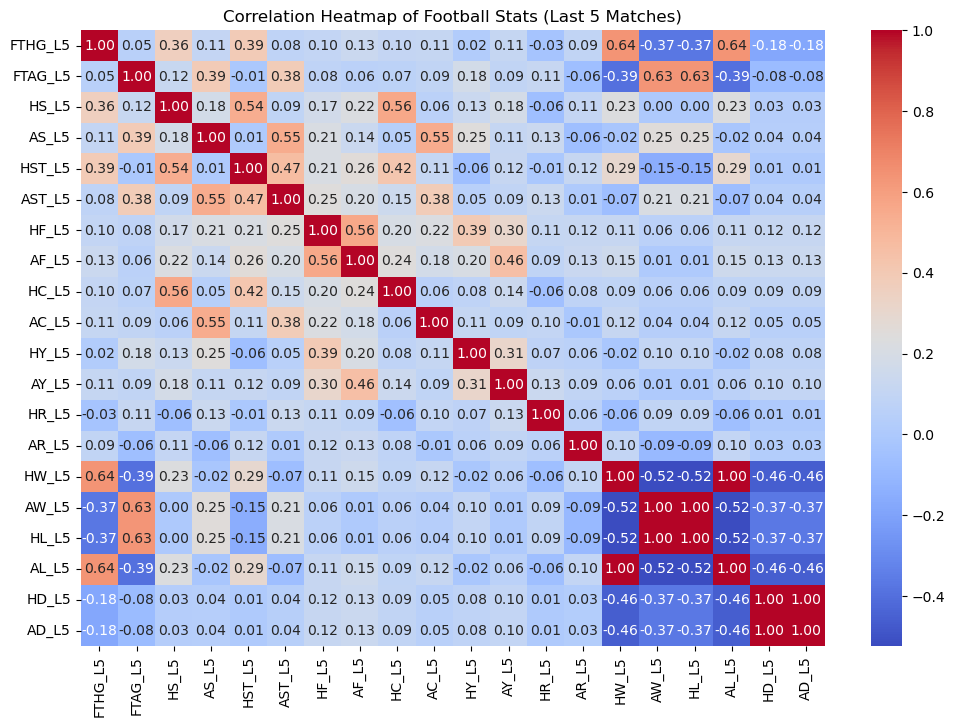

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['FTHG_L5', 'FTAG_L5', 'HS_L5', 'AS_L5', 'HST_L5', 'AST_L5',
                  'HF_L5', 'AF_L5', 'HC_L5', 'AC_L5', 'HY_L5', 'AY_L5', 
                  'HR_L5', 'AR_L5', 'HW_L5', 'AW_L5', 'HL_L5', 'AL_L5', 'HD_L5', 'AD_L5']

correlation_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Football Stats (Last 5 Matches)')
plt.show()


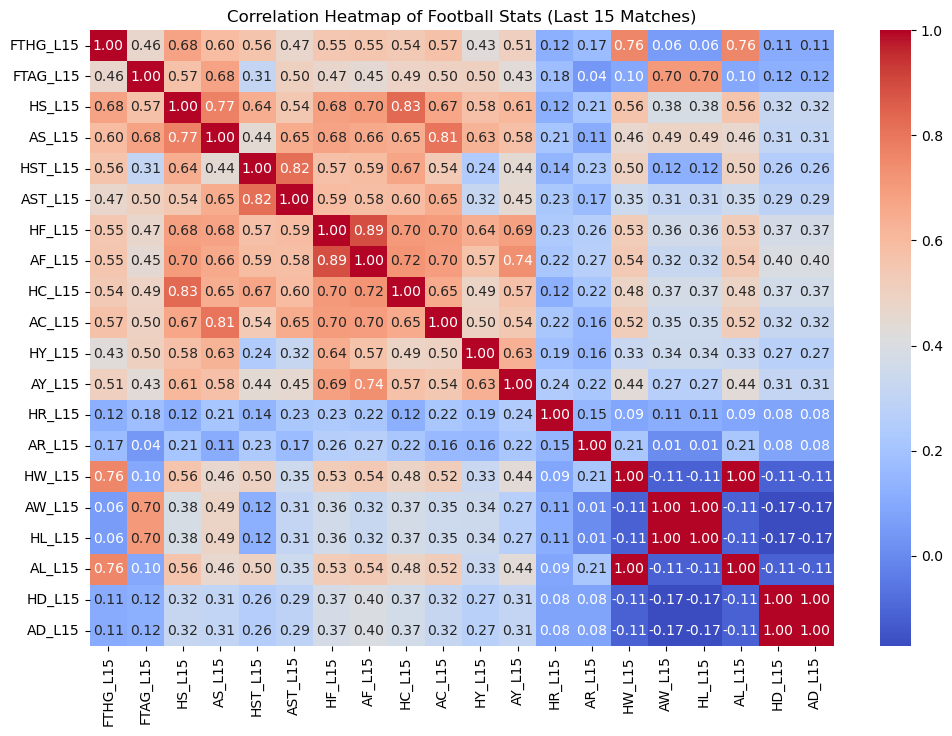

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ['FTHG_L15', 'FTAG_L15', 'HS_L15', 'AS_L15', 'HST_L15', 'AST_L15',
                  'HF_L15', 'AF_L15', 'HC_L15', 'AC_L15', 'HY_L15', 'AY_L15', 
                  'HR_L15', 'AR_L15', 'HW_L15', 'AW_L15', 'HL_L15', 'AL_L15', 'HD_L15', 'AD_L15']
correlation_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Football Stats (Last 15 Matches)')
plt.show()


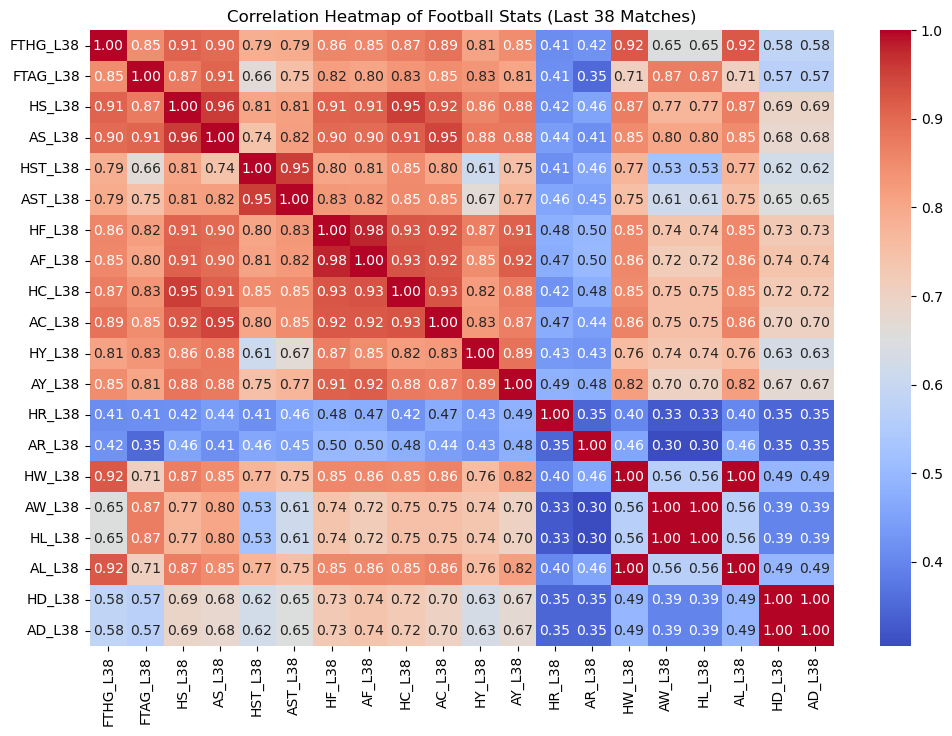

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['FTHG_L38', 'FTAG_L38', 'HS_L38', 'AS_L38', 'HST_L38', 'AST_L38',
                  'HF_L38', 'AF_L38', 'HC_L38', 'AC_L38', 'HY_L38', 'AY_L38', 
                  'HR_L38', 'AR_L38', 'HW_L38', 'AW_L38', 'HL_L38', 'AL_L38', 'HD_L38', 'AD_L38']
correlation_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Football Stats (Last 38 Matches)')
plt.show()
